<a id=top-page></a>
# Cost function behavior on toy functions

In this notebook, we explore the behavior of the cost function, $\mathcal{L}$, on toy functions.

The analysis in this notebook is performed in the following steps:

- [How does the cost function, $\mathcal{L}$, respond to feature size?](#feature-size)
- [How does the cost function, $\mathcal{L}$, respond to multiple feature sizes?](#multiple-feature-sizes)
- [How does the cost function, $\mathcal{L}$, respond to non-uniqueness?](#non-uniqueness)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
penalty = 'log-sigma-over-peak'
norm = 'max'
power = 1
colormap = 'plasma'
save_figures = True

<a id=feature-size></a>
***

## How does the cost function, $\mathcal{L}$, respond to feature size?

[Go to the top](#top-page)

	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.5 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------
	Time it took: 0.4 minutes.
----------------------------------------


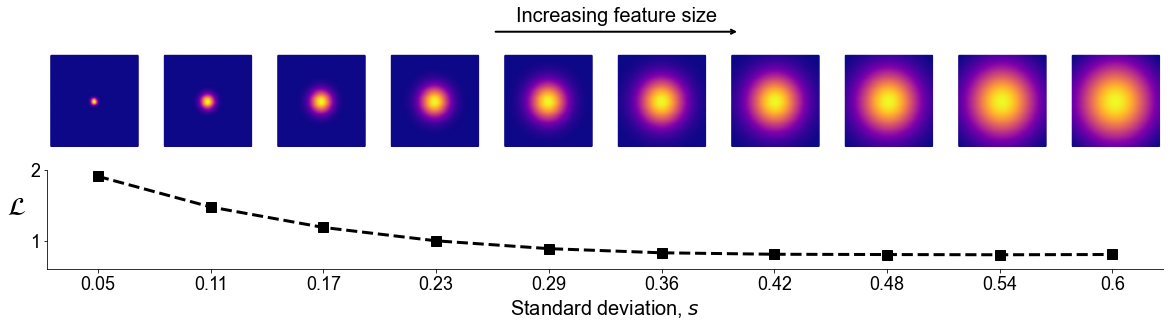

In [3]:
x, y = np.meshgrid(np.linspace(-1,1,80), np.linspace(-1,1,80))
x = x.ravel()[:,None]
y = y.ravel()[:,None]
stds = [round(i, 2) for i in np.linspace(0.05,0.6,10)]

bandwidth_values = np.logspace(-2.5, 0.5, 200)

fig = plt.figure(figsize=(len(stds)*2, 4))
widths = [1 for i in stds]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(stds), nrows=2, width_ratios=widths, height_ratios=heights)

sigmas_feature_size_list = []
derivatives_feature_size_list = []
costs_feature_size = []

for i, std in enumerate(stds):

    tic = time.perf_counter()

    z = np.exp(-((x*x+y*y) / (2.0 * std**2)))
    z = z.ravel()[:,None]
    z = z/np.max(z)

    variance_data = analysis.compute_normalized_variance(np.hstack((x,y)), 
                                                         z, 
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)
    
    derivative, sigma, _ = analysis.normalized_variance_derivative(variance_data)
    
    sigmas_feature_size_list.append(sigma)
    derivatives_feature_size_list.append(derivative['var'])
    
    cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 norm=norm,
                                                                 integrate_to_peak=False)
    costs_feature_size.append(cost)
    
    toc = time.perf_counter()
    print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

    ax = fig.add_subplot(spec[0,i:i+1])
    scat = ax.scatter(x, y, c=z, s=2, cmap=colormap)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([]);
    ax.set_yticks([]);

# cbaxes = inset_axes(ax, width="50%", height="8%", loc='upper right')
# cbar = plt.colorbar(scat, ticks=[0,0.5,1], orientation='horizontal', aspect=8, cax=cbaxes)
# cbar.ax.set_xlabel('$\phi$', fontsize=30, rotation=0)
# for t in cbar.ax.get_xticklabels():
#      t.set_fontsize(20)
    
ax = fig.add_subplot(spec[1,0:len(stds)])
x_axis = [i for i in range(0,len(stds))]
ax.plot(x_axis, costs_feature_size, 's--', c='k', lw=3, markersize=10)
ax.set_xticks(x_axis)
ax.set_xticklabels(stds, fontsize=18)
ax.set_yticks([1,2])
ax.set_yticklabels([1,2], fontsize=18)
plt.ylim([np.min(costs_feature_size)-0.2, 2])
ax.set_xlabel('Standard deviation, $s$', fontsize=20)
ax.set_ylabel('$\mathcal{L}$', fontsize=26, rotation=0, horizontalalignment='right')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.text(0.42, 2.5, 'Increasing feature size', fontsize=20, transform=ax.transAxes)
plt.annotate('', xy=(0.4, 2.4), xycoords='axes fraction', xytext=(0.62, 2.4),
            arrowprops=dict(arrowstyle="<-", color='k', lw=2))

if save_figures: plt.savefig('../figures/cost-function-response-to-feature-size.png', dpi=250, bbox_inches='tight')

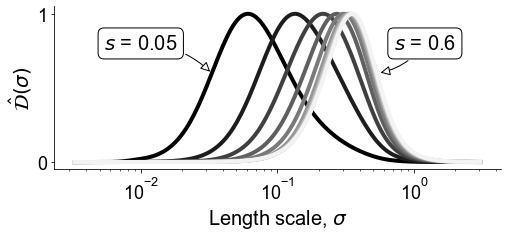

In [4]:
fig = plt.figure(figsize=(8, 3))
color_map_colors = cm.get_cmap('Greys')
variable_colors = np.flipud(color_map_colors(np.linspace(0.1, 1, len(stds))))

for i in range(0,len(stds)):
    plt.semilogx(sigmas_feature_size_list[i], derivatives_feature_size_list[i], color=variable_colors[i], lw=4)

ann = plt.annotate("$s$ = 0.05",
                  xy=(0.033, 0.6), xycoords='data',
                  xytext=(0.01, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),)

ann = plt.annotate("$s$ = 0.6",
                  xy=(0.55, 0.6), xycoords='data',
                  xytext=(1.2, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),)

plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=18)
plt.yticks([0,1], fontsize=18)

if save_figures: plt.savefig('../figures/D-hat-increasing-feature-size.png', dpi=300, bbox_inches='tight')

<a id=multiple-feature-sizes></a>
***
## How does the cost function, $\mathcal{L}$, respond to multiple feature sizes?

[Go to the top](#top-page)

	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------


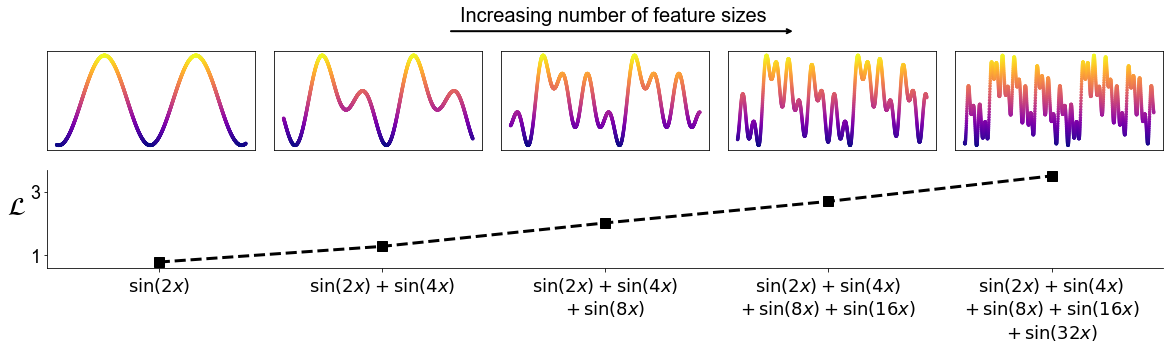

In [5]:
x = np.linspace(-4, 2.5, 2000)
features = [1, 2, 3, 4, 5]

bandwidth_values = np.logspace(-3, 0.5, 200)

fig = plt.figure(figsize=(20, 4))
widths = [1 for i in range(0,10)]
heights = [1, 1]
spec = fig.add_gridspec(ncols=10, nrows=2, width_ratios=widths, height_ratios=heights)

sigmas_multiple_feature_sizes_list = []
derivatives_multiple_feature_sizes_list = []
costs_multiple_feature_sizes = []

for i in range(0,len(features)):

    tic = time.perf_counter()
    
    if i == 0:
        z = np.sin(2*x)
    if i == 1:
        z = np.sin(2*x) + np.sin(4*x)
    if i == 2:
        z = np.sin(2*x) + np.sin(4*x) + np.sin(8*x)
    if i == 3:
        z = np.sin(2*x) + np.sin(4*x) + np.sin(8*x) + np.sin(16*x)
    if i == 4:
        z = np.sin(2*x) + np.sin(4*x) + np.sin(8*x) + np.sin(16*x) + np.sin(32*x)

    z = z/np.max(z)
        
    variance_data = analysis.compute_normalized_variance(x[:,None], 
                                                         z.ravel()[:,None], 
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)
    
    derivative, sigma, _ = analysis.normalized_variance_derivative(variance_data)
    
    sigmas_multiple_feature_sizes_list.append(sigma)
    derivatives_multiple_feature_sizes_list.append(derivative['var'])

    cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 norm=norm,
                                                                 integrate_to_peak=False)
    

    costs_multiple_feature_sizes.append(cost)
    
    toc = time.perf_counter()
    print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)
    
    ax = fig.add_subplot(spec[0,2*i:2*i+2])
    ax.scatter(x, z, c=z, s=6, cmap='plasma')
    ax.set_xticks([]);
    ax.set_yticks([]);

ax = fig.add_subplot(spec[1,0:10])
x_axis = [i for i in features]
ax.plot(x_axis, costs_multiple_feature_sizes, 's--', c='k', lw=3, markersize=10, label='Weighted')
ax.set_xlim([0.5,5.5])
ax.set_xticks(x_axis)
ax.set_xticklabels(['$\sin(2x)$',
                    '$\sin(2x)+\sin(4x)$',
                    '$\sin(2x)+\sin(4x)$\n$+\,\sin(8x)$',
                    '$\sin(2x)+\sin(4x)$\n$+\,\sin(8x)+\sin(16x)$',
                    '$\sin(2x)+\sin(4x)$\n$+\,\sin(8x)+\sin(16x)$\n$+\,\sin(32x)$'], fontsize=18)
ax.set_yticks([1,3])
ax.set_yticklabels([1,3], fontsize=18)
plt.ylim([np.min(costs_multiple_feature_sizes)-0.2, np.max(costs_multiple_feature_sizes)+0.2])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('$\mathcal{L}$', fontsize=26, rotation=0, horizontalalignment='right')
plt.text(0.37, 2.5, 'Increasing number of feature sizes', fontsize=20, transform=ax.transAxes)
plt.annotate('', xy=(0.36, 2.4), xycoords='axes fraction', xytext=(0.67, 2.4), arrowprops=dict(arrowstyle="<-", color='k', lw=2))

if save_figures: plt.savefig('../figures/cost-function-response-to-multiple-feature-sizes.png', dpi=300, bbox_inches='tight')

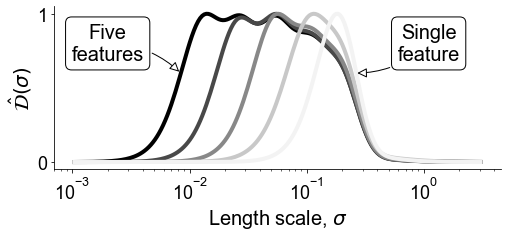

In [6]:
fig = plt.figure(figsize=(8, 3))
color_map_colors = cm.get_cmap('Greys_r')
variable_colors = np.flipud(color_map_colors(np.linspace(0, 0.9, len(features))))

for i in range(0,len(features)):

    plt.semilogx(sigmas_multiple_feature_sizes_list[i], derivatives_multiple_feature_sizes_list[i], color=variable_colors[i], lw=4, label=str(i), zorder=-i)
    
ann = plt.annotate("Five\nfeatures",
                  xy=(0.0084, 0.6), xycoords='data',
                  xytext=(0.002, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),)

ann = plt.annotate("Single\nfeature",
                  xy=(0.26, 0.6), xycoords='data',
                  xytext=(1.1, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),)

plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=18)
plt.yticks([0,1], fontsize=18)

if save_figures: plt.savefig('../figures/D-hat-multiple-feature-sizes.png', dpi=300, bbox_inches='tight')

<a id=non-uniqueness></a>
***

## How does the cost function, $\mathcal{L}$, respond to non-uniqueness?

[Go to the top](#top-page)

	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------
	Time it took: 0.0 minutes.
----------------------------------------


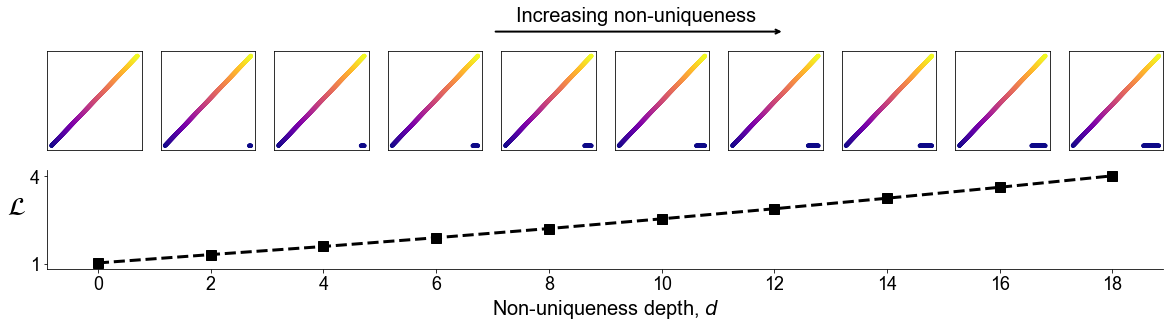

In [7]:
n_points = 1000
x_base = np.linspace(0,100,n_points)
overlap_depths = np.array([0,1,2,3,4,5,6,7,8,9])*10

bandwidth_values = np.logspace(-6, 2, 200)

fig = plt.figure(figsize=(len(overlap_depths)*2, 4))
widths = [1 for i in overlap_depths]
heights = [1, 1]
spec = fig.add_gridspec(ncols=len(overlap_depths), nrows=2, width_ratios=widths, height_ratios=heights)

sigmas_non_uniqueness_list = []
derivatives_non_uniqueness_list = []
costs_non_uniqueness = []

for j, n_points_overlap_x in enumerate(overlap_depths):

    tic = time.perf_counter()
    
    x_overlap = np.linspace(100-n_points_overlap_x/5,100.1,n_points_overlap_x)
    x = np.vstack((x_base[:,None], x_overlap[:,None]))
    z = np.zeros((n_points+n_points_overlap_x,1))
    for observation, x_value in enumerate(x):
        if observation < n_points:
            z[observation] = x_value
        else:
            z[observation] = 0

    z = z/np.max(z)
    
    variance_data = analysis.compute_normalized_variance(x, 
                                                         z, 
                                                         depvar_names=['var'], 
                                                         bandwidth_values=bandwidth_values)
    
    derivative, sigma, _ = analysis.normalized_variance_derivative(variance_data)
    
    sigmas_non_uniqueness_list.append(sigma)
    derivatives_non_uniqueness_list.append(derivative['var'])
    
    cost = analysis.cost_function_normalized_variance_derivative(variance_data,
                                                                 penalty_function=penalty,
                                                                 power=power,
                                                                 norm=norm,
                                                                 integrate_to_peak=False)

    costs_non_uniqueness.append(cost)
    
    toc = time.perf_counter()
    print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)
    
    ax = fig.add_subplot(spec[0,j:j+1])
    ax.scatter(x,z,c=z, s=10, cmap='plasma')
    ax.set_xticks([]);
    ax.set_yticks([]);

ax = fig.add_subplot(spec[1,0:len(overlap_depths)])
x_axis = [i for i in range(0,len(overlap_depths))]
ax.plot(x_axis, costs_non_uniqueness, 's--', c='k', lw=3, markersize=10, label='Weighted')
ax.set_xticks(x_axis)
ax.set_xticklabels([int(i) for i in overlap_depths/5], fontsize=18)
ax.set_yticks([1,4])
ax.set_yticklabels([1,4], fontsize=18)
plt.ylim([np.min(costs_non_uniqueness)-0.2, np.max(costs_non_uniqueness)+0.2])
ax.set_xlabel('Non-uniqueness depth, $d$', fontsize=20)
ax.set_ylabel('$\mathcal{L}$', fontsize=26, rotation=0, horizontalalignment='right')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.text(0.42, 2.5, 'Increasing non-uniqueness', fontsize=20, transform=ax.transAxes)
plt.annotate('', xy=(0.4, 2.4), xycoords='axes fraction', xytext=(0.66, 2.4),
            arrowprops=dict(arrowstyle="<-", color='k', lw=2))
            
if save_figures: plt.savefig('../figures/cost-function-response-to-non-uniqueness.png', dpi=300, bbox_inches='tight')

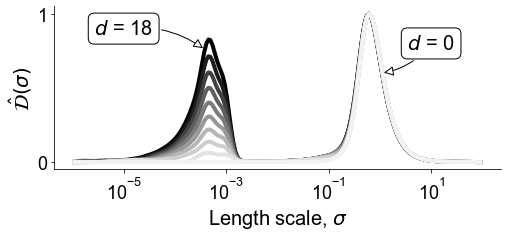

In [8]:
fig = plt.figure(figsize=(8, 3))
color_map_colors = cm.get_cmap('Greys_r')
variable_colors = np.flipud(color_map_colors(np.linspace(0, 0.9, len(overlap_depths))))

for i in range(0, len(overlap_depths)):
    plt.semilogx(sigmas_non_uniqueness_list[i], derivatives_non_uniqueness_list[i], color=variable_colors[i], lw=4, zorder=-i)

ann = plt.annotate("$d$ = 18",
                  xy=(0.00038, 0.76), xycoords='data',
                  xytext=(0.00001, 0.9), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),)

ann = plt.annotate("$d$ = 0",
                  xy=(1.1, 0.6), xycoords='data',
                  xytext=(10, 0.8), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),)

plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=18)
plt.yticks([0,1], fontsize=18)

if save_figures: plt.savefig('../figures/D-hat-increasing-non-uniqueness.png', dpi=300, bbox_inches='tight')

***